# 📌 분류 실습 2편

## 1. 기본 설정 ❗

#### --분석에 필요한 기본 모듈--

In [286]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import sklearn
import time
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.ticker import MaxNLocator
from collections import Counter
%matplotlib inline
plt.style.use('fivethirtyeight')

#### --분석에 필요한 알고리즘 모델--

In [287]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, roc_auc_score
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#### --분석에 필요한 폰트--

In [220]:
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = C:\WINDOWS\Fonts\EXTRABOLD.TTF
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicBold.ttf
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicUltraLight.ttf
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothicLight.ttf
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicUltraLight.ttf
NanumGothic = C:\Windows\Fonts\BOLD.TTF
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicBold.ttf
NanumGothic = C:\WINDOWS\Fonts\BOLD.TTF
NanumBarunGothic = C:\Windows\Fonts\NanumBarunGothic.ttf
NanumGothic = C:\Windows\Fonts\.TTF
NanumGothic = C:\Windows\Fonts\EXTRABOLD.TTF
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothicLight.ttf
NanumBarunGothic = C:\WINDOWS\Fonts\NanumBarunGothic.ttf
NanumGothic = C:\WINDOWS\Fonts\.TTF


## 2. 데이터 불러오기 📂

In [221]:
train = pd.read_csv('creditcard_data/open/train.csv', encoding = 'CP949')
test = pd.read_csv('creditcard_data/open/test.csv', encoding = 'CP949')

### *모델 학습에 필요한 필수 전처리

#### 1) gender변수 F,M -> 0,1로 바꿔주기

In [222]:
train['gender'] = train['gender'].replace(['F','M'], [0,  1])
test['gender'] = test['gender'].replace(['F','M'], [0,  1])

#### 2) car변수 N,Y -> 0,1로 바꿔주기

In [223]:
train['car'] = train['car'].replace(['N', 'Y'], [0, 1])
test['car'] = test['car'].replace(['N', 'Y'], [0, 1])

#### 3) reality변수 N,Y -> 0,1로 바꿔주기

In [224]:
train['reality'] = train['reality'].replace(['N', 'Y'], [0, 1])
test['reality'] = test['reality'].replace(['N', 'Y'], [0, 1])

#### 4) income_type 변수 0,1,2,3,4로 인코딩하기

In [225]:
train['income_type'] = label_encoder.fit_transform(train['income_type'])
test['income_type'] = label_encoder.transform(test['income_type'])

#### 5) edu_type변수 0,1,2,3,4로 인코딩하기

In [226]:
train['edu_type'] = label_encoder.fit_transform(train['edu_type'])
test['edu_type'] = label_encoder.transform(test['edu_type'])

#### 6) family_type변수 0,1,2,3,4로 인코딩하기

In [227]:
train['family_type'] = label_encoder.fit_transform(train['family_type'])
test['family_type'] = label_encoder.transform(test['family_type'])

#### 7) house_type변수 0,1,2,3,4,5로 인코딩하기

In [228]:
train['house_type'] = label_encoder.fit_transform(train['house_type'])
test['house_type'] = label_encoder.transform(test['house_type'])

## 3. 전처리

#### 1) DAYS_EMPLOYED변수 양수(일을 한 적 없음)는 0으로 변경

In [229]:
train.loc[train['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0
test.loc[test['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0

#### 2) DAYS_EMPLOYE변수 음수를 양수로 변경

In [230]:
train['DAYS_EMPLOYED']=-train['DAYS_EMPLOYED']
test['DAYS_EMPLOYED']=-test['DAYS_EMPLOYED']

#### 3) DAYS_EMPLOYED변수 년으로 단위 변경한 변수 생성

In [231]:
train['Year_EMPLOYED']=(train['DAYS_EMPLOYED']/365)
test['Year_EMPLOYED']=(test['DAYS_EMPLOYED']/365)

#### 4) DAYS_EMPLOYED변수 월로 단위 변경한 변수 생성

In [232]:
train['Month_EMPLOYED']=(train['DAYS_EMPLOYED']/30)
test['Month_EMPLOYED']=(test['DAYS_EMPLOYED']/30)

#### 5) DAYS_BIRTH변수 음수를 양수로 변경

In [233]:
train['DAYS_BIRTH']=-train['DAYS_BIRTH']
test['DAYS_BIRTH']=-test['DAYS_BIRTH']

#### 6) DAYS_BIRTH변수 이용해서 나이 변수 생성

In [234]:
train['age'] = (train['DAYS_BIRTH']/365)
train = train.astype({'age': 'int'})
test['age'] = (test['DAYS_BIRTH']/365)
test = test.astype({'age': 'int'})

#### 7) begin_month변수 음수를 양수로 변경

In [235]:
train['begin_month']=-train['begin_month']
test['begin_month']=-test['begin_month']

#### 8) FLAG_MOBIL변수 모든 행 값이 1이므로 불필요한 변수로 판단 변수 제거

In [236]:
train = train.drop("FLAG_MOBIL", axis = 1)
test =  test.drop("FLAG_MOBIL", axis = 1)

#### 9) family_size변수보다 child_num변수가 더 큰 오류 행 삭제

In [237]:
error = train[train['family_size'] < train['child_num']]

In [238]:
error

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,work_phone,phone,email,occyp_type,family_size,begin_month,credit,Year_EMPLOYED,Month_EMPLOYED,age
14900,14900,1,1,0,2,225000.0,4,4,1,1,...,0,0,0,Drivers,1.0,30.0,2.0,6.060274,73.733333,40


In [239]:
train = train.drop([14900])

#### 10) occpy_type변수결측치가 8171개 존재하므로 변수 삭제

In [240]:
train = train.drop("occyp_type", axis = 1)
test =  test.drop("occyp_type", axis = 1)

#### 11) index 변수 삭제

In [241]:
train = train.drop("index", axis=1)
test = test.drop("index", axis=1)

### * 데이터 분할

In [242]:
S_train = sklearn.utils.shuffle(train, random_state=0)

In [243]:
train_x = S_train.drop("credit", axis = 1)
train_y = S_train['credit']
test_x = test

In [244]:
X_train, X_test, y_train, y_test=train_test_split(train_x, train_y,
                                                  test_size=0.2, random_state=0)

In [245]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21164, 19)
(21164,)
(5292, 19)
(5292,)


## 4. Decision Tree(결정트리)

In [246]:
start_time=time.time()

In [247]:
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(test_x)

In [248]:
print(time.time()-start_time)

0.25346875190734863


In [249]:
cv_method = KFold(n_splits=5)
params = {
    'max_depth':[2,3],
    'min_samples_leaf':[2],
    'min_samples_split':[2,4,6],
    'max_leaf_nodes':[2]
}
dt_grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=cv_method, n_jobs=-1)
dt_grid_cv.fit(X_train, y_train)

print(dt_grid_cv.best_params_)
print(dt_grid_cv.best_score_)

{'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.6922132318889702


## 5. Random Forest(랜덤 포레스트)

In [253]:
start_time=time.time()

In [254]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

rf_pred=rf_clf.predict(test_x)

In [255]:
print(time.time()-start_time)

3.8084943294525146


In [256]:
cv_method = KFold(n_splits=4)
params={
    'n_estimators':[200],
    'max_depth' : [22,24],
    'min_samples_leaf' : [2,4],
    'min_samples_split' : [8,10]
 }

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=cv_method)
rf_grid_cv.fit(X_train, y_train)

print(rf_grid_cv.best_params_)
print(rf_grid_cv.best_score_)

{'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
0.713995463995464


## 6. Gradient Boosting(그래디언트 부스팅)

In [260]:
start_time=time.time()

In [261]:
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(test_x)

In [262]:
print(time.time()-start_time)

12.854140281677246


In [263]:
cv_method = KFold(n_splits=5)
params={
    'n_estimators' : [100],
    'learning_rate' : [0.1],
    'subsample': [0.8],
    'max_depth' : [10],
    'min_samples_leaf' : [2],
    'min_samples_split' : [6]
}
gb_grid_cv=GridSearchCV(gb_clf,param_grid=params,cv=cv_method,verbose=1,n_jobs=-1)
gb_grid_cv.fit(X_train,y_train)

print(gb_grid_cv.best_params_)
print(gb_grid_cv.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   52.8s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   53.4s finished


{'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'subsample': 0.8}
0.7106882215842131


## 7. XGBoost

In [267]:
start_time=time.time()

In [268]:
xgb_clf=XGBClassifier(random_state=0)
xgb_clf.fit(X_train, y_train)
xgb_pred=xgb_clf.predict(test_x)

In [269]:
print(time.time()-start_time)

3.941575050354004


In [273]:
cv_method = KFold(n_splits=5)

params = {
    'n_estimators' : [100],
    'learning_rate': [0.1],
    'max_depth':[14],
    'subsample': [0.8],
    'min_child_weight':[1,2],
    'colsample_bytree':[0.5]
}

xgb_grid_cv=GridSearchCV(xgb_clf, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
xgb_grid_cv.fit(X_train,y_train, eval_set=[(X_test,y_test)])

print(xgb_grid_cv.best_params_)
print(xgb_grid_cv.best_score_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   25.3s remaining:   16.8s


[0]	validation_0-merror:0.325964


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.9s finished


[1]	validation_0-merror:0.305556
[2]	validation_0-merror:0.30102
[3]	validation_0-merror:0.300642
[4]	validation_0-merror:0.298753
[5]	validation_0-merror:0.29932
[6]	validation_0-merror:0.29932
[7]	validation_0-merror:0.298186
[8]	validation_0-merror:0.299887
[9]	validation_0-merror:0.298186
[10]	validation_0-merror:0.297808
[11]	validation_0-merror:0.298186
[12]	validation_0-merror:0.296674
[13]	validation_0-merror:0.296863
[14]	validation_0-merror:0.296674
[15]	validation_0-merror:0.297241
[16]	validation_0-merror:0.298375
[17]	validation_0-merror:0.296485
[18]	validation_0-merror:0.297619
[19]	validation_0-merror:0.296296
[20]	validation_0-merror:0.296863
[21]	validation_0-merror:0.295162
[22]	validation_0-merror:0.295351
[23]	validation_0-merror:0.294218
[24]	validation_0-merror:0.292895
[25]	validation_0-merror:0.294218
[26]	validation_0-merror:0.293462
[27]	validation_0-merror:0.294218
[28]	validation_0-merror:0.292895
[29]	validation_0-merror:0.291761
[30]	validation_0-merror:0

In [274]:
xgb_preds=xgb_grid_cv.predict(X_test)

In [275]:
xgb_accuracy=accuracy_score(y_test,xgb_preds)

In [276]:
print(xgb_accuracy)

0.7180650037792895


## 8. LightGBM

In [277]:
start_time=time.time()

In [278]:
lgbm_clf=LGBMClassifier(random_state=0)
lgbm_clf.fit(train_x, train_y)
lgbm_pred=lgbm_clf.predict(test_x)

In [279]:
print(time.time()-start_time)

1.2418100833892822


In [280]:
cv_method = KFold(n_splits=5)

params = {'n_estimators':[500],
          'max_depth': [14,16],
          'learning_rate':[0.1],
          'num_leaves':[34,36],
          'min_child_samples': [12,14],
          'subsample': [0.8],
         'colsample_bytree':[0.7,0.8]
         }

lgbm_grid_cv = GridSearchCV(lgbm_clf, param_grid=params, cv=cv_method, verbose=True, n_jobs=-1)
lgbm_grid_cv.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc_mu',
         eval_set=[(X_test, y_test)])

print(lgbm_grid_cv.best_params_)
print(lgbm_grid_cv.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.8min finished


[1]	valid_0's auc_mu: 0.631226	valid_0's multi_logloss: 0.874688
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc_mu: 0.639785	valid_0's multi_logloss: 0.866858
[3]	valid_0's auc_mu: 0.649964	valid_0's multi_logloss: 0.855276
[4]	valid_0's auc_mu: 0.654894	valid_0's multi_logloss: 0.84638
[5]	valid_0's auc_mu: 0.660852	valid_0's multi_logloss: 0.840868
[6]	valid_0's auc_mu: 0.663984	valid_0's multi_logloss: 0.836902
[7]	valid_0's auc_mu: 0.667619	valid_0's multi_logloss: 0.832831
[8]	valid_0's auc_mu: 0.672024	valid_0's multi_logloss: 0.829367
[9]	valid_0's auc_mu: 0.676696	valid_0's multi_logloss: 0.826311
[10]	valid_0's auc_mu: 0.679733	valid_0's multi_logloss: 0.822618
[11]	valid_0's auc_mu: 0.680522	valid_0's multi_logloss: 0.818668
[12]	valid_0's auc_mu: 0.679773	valid_0's multi_logloss: 0.815245
[13]	valid_0's auc_mu: 0.681582	valid_0's multi_logloss: 0.812119
[14]	valid_0's auc_mu: 0.683147	valid_0's multi_logloss: 0.810147
[15]	valid_0's auc_mu: 0

[135]	valid_0's auc_mu: 0.751189	valid_0's multi_logloss: 0.74691
[136]	valid_0's auc_mu: 0.751635	valid_0's multi_logloss: 0.746613
[137]	valid_0's auc_mu: 0.751717	valid_0's multi_logloss: 0.746393
[138]	valid_0's auc_mu: 0.751918	valid_0's multi_logloss: 0.746393
[139]	valid_0's auc_mu: 0.751977	valid_0's multi_logloss: 0.746341
[140]	valid_0's auc_mu: 0.752191	valid_0's multi_logloss: 0.746068
[141]	valid_0's auc_mu: 0.752759	valid_0's multi_logloss: 0.745761
[142]	valid_0's auc_mu: 0.75259	valid_0's multi_logloss: 0.745679
[143]	valid_0's auc_mu: 0.752532	valid_0's multi_logloss: 0.745734
[144]	valid_0's auc_mu: 0.752096	valid_0's multi_logloss: 0.745722
[145]	valid_0's auc_mu: 0.752397	valid_0's multi_logloss: 0.745581
[146]	valid_0's auc_mu: 0.752439	valid_0's multi_logloss: 0.745471
[147]	valid_0's auc_mu: 0.752429	valid_0's multi_logloss: 0.745464
[148]	valid_0's auc_mu: 0.752608	valid_0's multi_logloss: 0.745325
[149]	valid_0's auc_mu: 0.753135	valid_0's multi_logloss: 0.7450

[259]	valid_0's auc_mu: 0.761163	valid_0's multi_logloss: 0.735133
[260]	valid_0's auc_mu: 0.760949	valid_0's multi_logloss: 0.735301
[261]	valid_0's auc_mu: 0.760896	valid_0's multi_logloss: 0.735223
[262]	valid_0's auc_mu: 0.761007	valid_0's multi_logloss: 0.735122
[263]	valid_0's auc_mu: 0.761463	valid_0's multi_logloss: 0.734922
[264]	valid_0's auc_mu: 0.761383	valid_0's multi_logloss: 0.734909
[265]	valid_0's auc_mu: 0.761219	valid_0's multi_logloss: 0.735068
[266]	valid_0's auc_mu: 0.761145	valid_0's multi_logloss: 0.735173
[267]	valid_0's auc_mu: 0.761014	valid_0's multi_logloss: 0.735312
[268]	valid_0's auc_mu: 0.761334	valid_0's multi_logloss: 0.73512
[269]	valid_0's auc_mu: 0.761516	valid_0's multi_logloss: 0.735069
[270]	valid_0's auc_mu: 0.761827	valid_0's multi_logloss: 0.734855
[271]	valid_0's auc_mu: 0.76202	valid_0's multi_logloss: 0.73472
[272]	valid_0's auc_mu: 0.762012	valid_0's multi_logloss: 0.734751
[273]	valid_0's auc_mu: 0.762351	valid_0's multi_logloss: 0.73458

[382]	valid_0's auc_mu: 0.768342	valid_0's multi_logloss: 0.732262
[383]	valid_0's auc_mu: 0.768424	valid_0's multi_logloss: 0.732177
[384]	valid_0's auc_mu: 0.768509	valid_0's multi_logloss: 0.732108
[385]	valid_0's auc_mu: 0.768464	valid_0's multi_logloss: 0.732205
[386]	valid_0's auc_mu: 0.768242	valid_0's multi_logloss: 0.732448
[387]	valid_0's auc_mu: 0.768285	valid_0's multi_logloss: 0.732439
[388]	valid_0's auc_mu: 0.76834	valid_0's multi_logloss: 0.732414
[389]	valid_0's auc_mu: 0.768314	valid_0's multi_logloss: 0.732509
[390]	valid_0's auc_mu: 0.768132	valid_0's multi_logloss: 0.732671
[391]	valid_0's auc_mu: 0.768202	valid_0's multi_logloss: 0.732705
[392]	valid_0's auc_mu: 0.768348	valid_0's multi_logloss: 0.732485
[393]	valid_0's auc_mu: 0.768433	valid_0's multi_logloss: 0.732576
[394]	valid_0's auc_mu: 0.76832	valid_0's multi_logloss: 0.73253
[395]	valid_0's auc_mu: 0.768491	valid_0's multi_logloss: 0.732474
[396]	valid_0's auc_mu: 0.768788	valid_0's multi_logloss: 0.73221

### 최종 모델 XGBoost의 변수 중요도

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

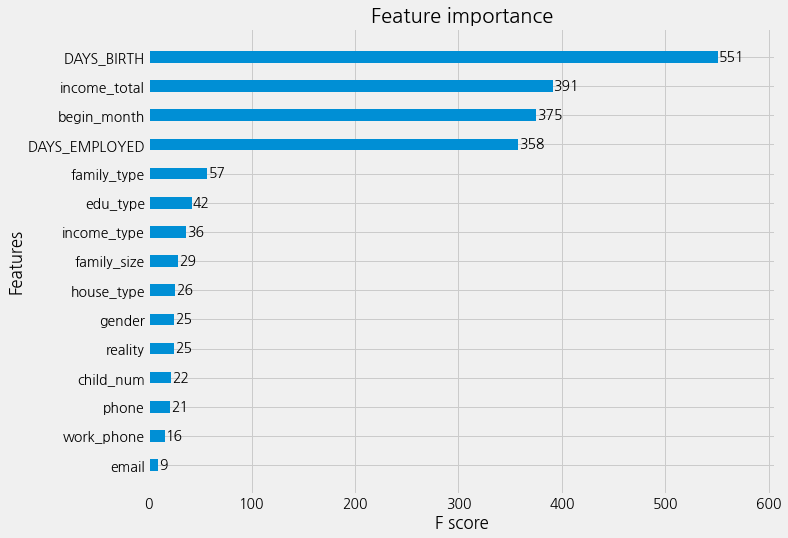

In [294]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=15, height=0.4)